<a href="https://colab.research.google.com/github/claudiasofiaC/DS-Unit-1-Sprint-2-Statistics/blob/master/Claudia_Statistics_Probability_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 2 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [0]:
### YOUR CODE STARTS HERE

In [0]:
import pandas as pd
import numpy as np

In [0]:
url= pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data')

In [4]:
url.head()

,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y


In [0]:
#no header

url.columns = ['party', 'handicapped-infants', 'water-project-cost-sharing', 
               'adoption-of-the-budget-resolution', 'physician-fee-freeze', 
               'el-salvador-aid', 'religious-groups-in-schools',
               'anti-satellite-test-ban', 'aid-to-nicaraguans',
               'mx-missle', 'immigration', 'synfules--corp-cutback',
               'education-spending', 'superfund-right-to-sue',
               'crime', 'duty-free', 'export-admin-act-south-africa']

In [6]:

print(url.shape)
url.head()


(434, 17)


,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguans,mx-missle,immigration,synfules--corp-cutback,education-spending,superfund-right-to-sue,crime,duty-free,export-admin-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y


In [8]:
url.dtypes

party                                object
handicapped-infants                  object
water-project-cost-sharing           object
adoption-of-the-budget-resolution    object
physician-fee-freeze                 object
el-salvador-aid                      object
religious-groups-in-schools          object
anti-satellite-test-ban              object
aid-to-nicaraguans                   object
mx-missle                            object
immigration                          object
synfules--corp-cutback               object
education-spending                   object
superfund-right-to-sue               object
crime                                object
duty-free                            object
export-admin-act-south-africa        object
dtype: object

In [9]:
#checking fo nulls
url.isnull().sum()

party                                0
handicapped-infants                  0
water-project-cost-sharing           0
adoption-of-the-budget-resolution    0
physician-fee-freeze                 0
el-salvador-aid                      0
religious-groups-in-schools          0
anti-satellite-test-ban              0
aid-to-nicaraguans                   0
mx-missle                            0
immigration                          0
synfules--corp-cutback               0
education-spending                   0
superfund-right-to-sue               0
crime                                0
duty-free                            0
export-admin-act-south-africa        0
dtype: int64

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [11]:
#no empty spaces but i do see '?' where there was no vote either for or against the bill
#so im going to replace each'?' with a NaN so its neater
#also making it boolean 

votes = url.replace({'?':np.NaN, 'n':0, 'y':1})

votes.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguans,mx-missle,immigration,synfules--corp-cutback,education-spending,superfund-right-to-sue,crime,duty-free,export-admin-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
1,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
4,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


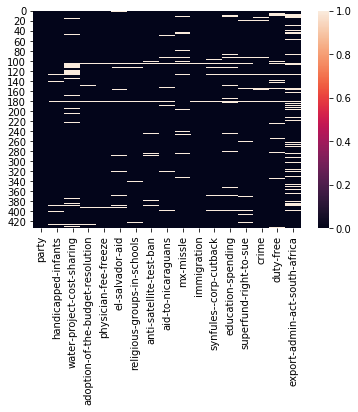

In [12]:
sns.heatmap(votes.isnull())

plt.show()

In [14]:
#making 2 different dataframes

dem = votes[votes.party == 'democrat']
print(dem.shape)
dem.head()

(267, 17)


,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguans,mx-missle,immigration,synfules--corp-cutback,education-spending,superfund-right-to-sue,crime,duty-free,export-admin-act-south-africa
1,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
4,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


In [15]:
rep = votes[votes.party == 'republican']
print(rep.shape)
rep.head()

(167, 17)


,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguans,mx-missle,immigration,synfules--corp-cutback,education-spending,superfund-right-to-sue,crime,duty-free,export-admin-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
6,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
9,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0
10,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,NaN,NaN


In [0]:
#sample t-tests

#testing on first column, Null Hypothesis that Democratic support is 0
#dropping NaNs for this test

from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel
from scipy.stats import ttest_1samp

In [25]:
ttest_1samp(rep['education-spending'], 1, nan_policy='omit')

Ttest_1sampResult(statistic=-4.7786840129393795, pvalue=4.1040560686303625e-06)

In [30]:
#2 sample t-test
print(dem['immigration'].mean())
print(rep['immigration'].mean())
ttest_ind(rep['immigration'], dem['immigration'], 
          nan_policy='omit')

0.4714828897338403
0.5548780487804879


Ttest_indResult(statistic=1.677960615722372, pvalue=0.0940899398968142)

In [0]:
#seems really really close, only 1.6 off and p-value is 0.09

In [28]:
stats.ttest_ind(rep['export-admin-act-south-africa'], 
                dem['export-admin-act-south-africa'], 
                nan_policy='omit')

Ttest_indResult(statistic=-6.893205322931943, pvalue=2.8060959129817107e-11)

In [0]:
#rep support is significantly higher on this bill than dem support

In [29]:
stats.ttest_ind(dem['synfules--corp-cutback'], 
                rep['synfules--corp-cutback'], 
                nan_policy='omit')

Ttest_indResult(statistic=8.293603989407588, pvalue=1.5759322301054064e-15)

In [0]:
#positive t stat here lets us know that dem support is hugher that rep support


In [32]:
#no significant difference in support
#due to insignificant p value we can reject the null hypothesis that the means 
#are equal

print(dem['water-project-cost-sharing'].mean())
print(rep['water-project-cost-sharing'].mean())

stats.ttest_ind(dem['water-project-cost-sharing'], 
               rep['water-project-cost-sharing'],
               nan_policy='omit')


0.502092050209205
0.5034013605442177


Ttest_indResult(statistic=-0.02491808700047811, pvalue=0.9801332440121653)

In [0]:
#this is all weird and confusing. I hate it. 